In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [33]:
df = pd.read_csv(r"C:\\Users\\KRISHNA\\Downloads\\Compressed\\house-prices-advanced-regression-techniques\\train.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [3]:
missing_value_per = df.isnull().sum()/df.shape[0] * 100
missing_value_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [5]:
missing_value_clm_gre_20 = missing_value_per[missing_value_per  >20].keys()
missing_value_clm_gre_20

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [6]:
df2_drop_clm = df.drop(columns = missing_value_clm_gre_20)
df2_drop_clm.shape

(1460, 76)

## First, Imputing the Numeric Values

In [7]:
df3_num = df2_drop_clm.select_dtypes(include=['int64','float64'])
df3_num

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0         706  ...           0   
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 38 columns]

In [8]:
null_clm = df3_num.isnull().sum()
null_clm

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [9]:
missing_num_var = [var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_num_var

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [19]:
df3_num[missing_num_var][df3_num[missing_num_var].isnull().any(axis=1)]

LotFrontage  MasVnrArea  GarageYrBlt
7             NaN       240.0       1973.0
12            NaN         0.0       1962.0
14            NaN       212.0       1960.0
16            NaN       180.0       1970.0
24            NaN         0.0       1968.0
...           ...         ...          ...
1443          NaN         0.0       1916.0
1446          NaN       189.0       1962.0
1449         21.0         0.0          NaN
1450         60.0         0.0          NaN
1453         90.0         0.0          NaN

[339 rows x 3 columns]

In [20]:
df['LotConfig'].unique() #THIS GIVES THE NO OF TYPES OF ELEMENT PRESENT IN THE COLUMN.

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [62]:
df[df.loc[:,'LotConfig'] == 'Inside']


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pave   NaN      Reg   
51      52          50       RM         52.0     6240   Pave   NaN      Reg   
53      54          20       RL         68.0    50271   Pave   NaN      IR1   
54      55          80       RL         60.0     7134   Pave   NaN      Reg   
55      56          20       RL        100.0    10175   Pave   NaN      IR1   
56      57         160       FV         24.0     2645   Pave  Pave      Reg   
59      60          20       RL         60.0     7200   Pave   NaN      Reg   
60      61          20       RL         63.0    13072   Pave   NaN      Reg   
61      62          75       RM         60.0     7200   Pave   NaN      Reg   
62      63         120       RL         44.0     6442   Pave   NaN      IR1   
63      64          70       RM         50.0    10300   Pave   NaN      IR1   
64      65          60       RL          NaN     9375   Pave   NaN      Reg   
65      66          60       RL         76.0     9591   Pave   NaN      Reg   
66      67          20       RL          NaN    19900   Pave   NaN      Reg   
67      68          20       RL         72.0    10665   Pave   NaN      IR1   
70      71          20       RL         95.0    13651   Pave   NaN      IR1   
73      74          20       RL         85.0    10200   Pave   NaN      Reg   
75      76         180       RM         21.0     1596   Pave   NaN      Reg   
76      77          20       RL          NaN     8475   Pa

In [25]:
df[df.loc[:,'LotConfig'] == 'Inside']['LotFrontage']


0       65.0
2       68.0
5       85.0
6       75.0
8       51.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1052, dtype: float64

In [26]:

df[df.loc[:,'LotConfig'] == 'Inside']['LotFrontage'].replace(np.nan,df[df.loc[:,'LotConfig'] == 'Inside']['LotFrontage'].mean())

0       65.0
2       68.0
5       85.0
6       75.0
8       51.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1052, dtype: float64

### Imputing Mean Value

In [72]:
df_copy = df.copy()


for vfcls in df['LotConfig'].unique():
    df_copy.update(df[df.loc[:,'LotConfig'] == vfcls]['LotFrontage'].replace(np.nan,df[df.loc[:,'LotConfig'] == vfcls]['LotFrontage'].mean()))

In [73]:
df_copy.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [76]:
var_fill_col = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
var_fill_class = ['LotConfig','Exterior2nd','GarageType']

for vfclass , vfcol in zip(var_fill_class , var_fill_col):
    for vfcls in df[vfclass].unique():
        df_copy.update(df[df.loc[:,vfclass] == vfcls][vfcol].replace(np.nan,df[df.loc[:,vfclass] == vfcls][vfcol].mean()))

In [81]:
df_copy[var_fill_col].isnull().sum()

LotFrontage     0
MasVnrArea      0
GarageYrBlt    81
dtype: int64

In [83]:
"""Here we can see that the GarageYrBlt values are still not filled, that is because the reference we have taken (GaragaeType), 
 has some NaN values present in him, So Make sure when fill values with a reference column, that column must not have any NaN 
 value present in it. """

'Here we can see that the GarageYrBlt values are still not filled, that is because the reference we have taken (GaragaeType), \n has some NaN values present in him, So Make sure when fill values with a reference column, that column must not have any NaN \n value present in it. '

In [84]:
var_fill_col = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
var_fill_class = ['LotConfig','Exterior2nd','KitchenQual']

for vfclass , vfcol in zip(var_fill_class , var_fill_col):
    for vfcls in df[vfclass].unique():
        df_copy.update(df[df.loc[:,vfclass] == vfcls][vfcol].replace(np.nan,df[df.loc[:,vfclass] == vfcls][vfcol].mean()))

In [85]:
df_copy[var_fill_col].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [86]:
#Now we see that after changing the reference , we got 9 null values in these above columns, that means they all are filled.

In [88]:
#Now we have used the mean value to fill the NaN values, similarly we can use the Median in the same function.

#Also, To fill the universal constants we can directly use them at the place of "df[df.loc[:,vfclass] == vfcls][vfcol].mean()" . 
#Ex: 0, 99 etc.

#### 2. Data Distribution to visualise

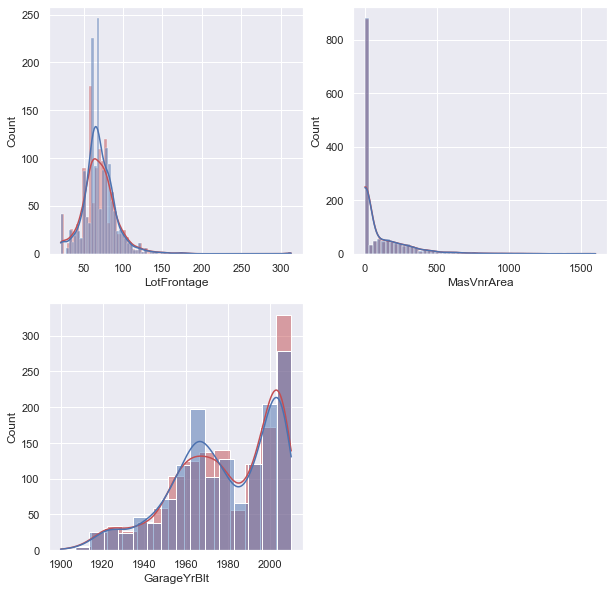

In [94]:
plt.figure(figsize=(10,10))

sns.set()
for i, var in enumerate(var_fill_col):
    plt.subplot(2,2,i+1)
    sns.histplot(df[var], color='r' , kde= True)
    sns.histplot(df_copy[var],color = 'b', kde = True)
    

### Imputing Median Value

In [100]:
df_copy_median = df.copy()

var_fill_col = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
var_fill_class = ['LotConfig','Exterior2nd','GarageType']

for vfclass , vfcol in zip(var_fill_class , var_fill_col):
    for vfcls in df[vfclass].unique():
        df_copy_median.update(df[df.loc[:,vfclass] == vfcls][vfcol].replace(np.nan,df[df.loc[:,vfclass] == vfcls][vfcol].median()))

In [103]:
df_copy_median[var_fill_col].isnull().sum()

LotFrontage     0
MasVnrArea      0
GarageYrBlt    81
dtype: int64

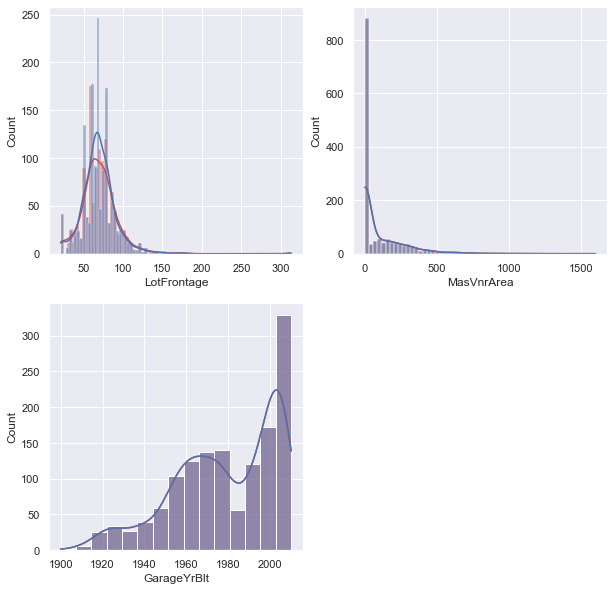

In [104]:
plt.figure(figsize=(10,10))

sns.set()
for i, var in enumerate(var_fill_col):
    plt.subplot(2,2,i+1)
    sns.histplot(df[var], color='r' , kde= True)
    sns.histplot(df_copy_median[var],color = 'b', kde = True)

C:\Users\KRISHNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISHNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISHNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISHNA\anaconda

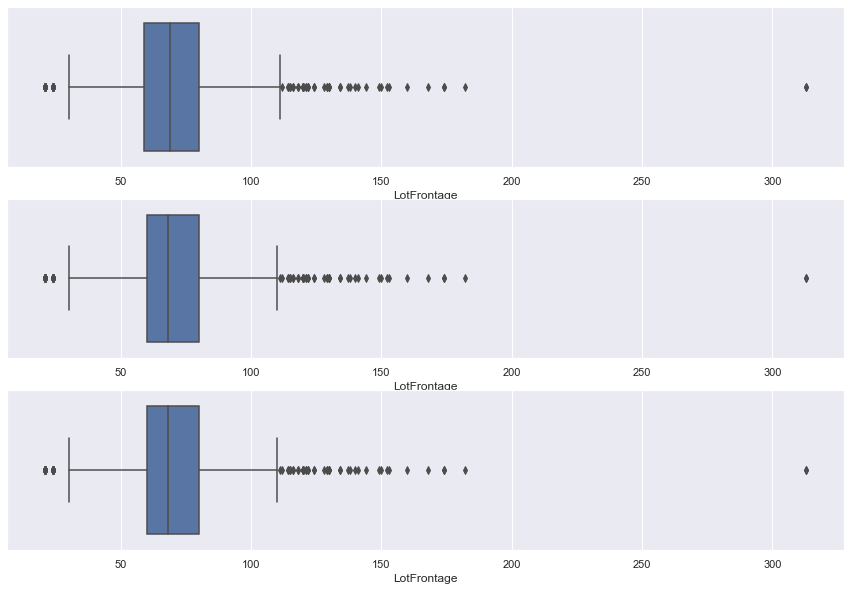

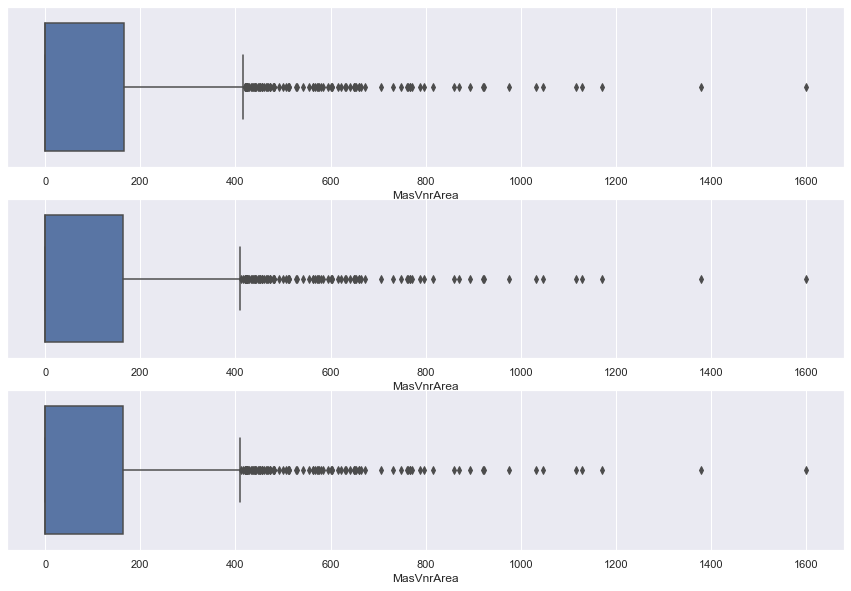

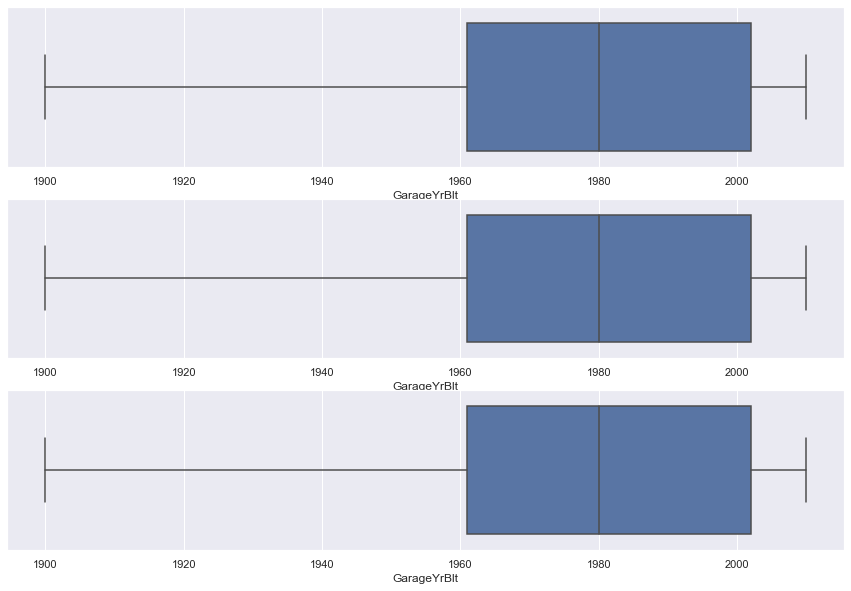

In [107]:
for i, var in enumerate(var_fill_col):
    plt.figure(figsize=(15,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df_copy[var])
    plt.subplot(3,1,3)
    sns.boxplot(df_copy_median[var])